# *Customer Churn Prediction for SyriaTel*

## Stakeholders and Main Problem

Our stakeholder is SyriaTel, a telecommunications company. The goal of this project is to provide SyriaTel with insights into the key factors contributing to customer churn and to build a predictive model that identifies customers at risk of leaving. This will enable SyriaTel to take proactive steps to retain customers and reduce revenue loss.


## Project Objectives


This project aims to achieve the following:

1. Develop a Churn Prediction Model-
 Build an effective classification model to predict customer churn for SyriaTel.
2. Evaluate Model Performance -
Assess the model's effectiveness using appropriate metrics for imbalanced data (e.g., Precision, Recall, F1-Score, ROC AUC).
3. Identify Key Churn Drivers -
 Determine which customer attributes and behaviors are most significant in predicting churn.
4. Propose Actionable Retention Strategies - 
Formulate data-driven recommendations for SyriaTel to reduce customer attrition.

## Key Business Questions

To address the overarching business problem, this project will seek to answer the following key questions:

1. Which customers are most likely to churn in the near future?
2. What characteristics or behaviors differentiate customers who churn from those who don't?
3. How effectively can we predict churn before it happens, and what are the trade-offs of our predictions?
4. How can insights from this model inform our customer retention strategies to reduce revenue loss for SyriaTel?

## Data Understanding and Preparation

The dataset for this project contains over 3,000 customer records from SyriaTel, a telecommunications provider. Each row represents an individual customer and includes attributes such as demographics, service subscriptions, usage patterns, and customer support interactions. The target variable is “Churn,” indicating whether a customer has discontinued the service. Data was provided in a single CSV file. Initial cleaning involved handling missing values, correcting data types, and encoding categorical variables. Further exploration and feature engineering were performed within the same notebook to prepare the data for modeling.


## Import Datasets

Datasets located at :

[Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) and imported as a CSV file. It contains over 3,000 records of customer attributes and churn behavior.


### Load Dependencies

In [71]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)


In [72]:
#Load the data
df = pd.read_csv('data/churn.csv')


# Preview the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [73]:
# View column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [74]:
# Check the shape of the data
df.shape

(3333, 21)

In [75]:
#Basic summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [76]:
#Get descriptive statistics for categorical/object columns
df.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


In [77]:
#Analyze the target variable
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [78]:
# Check the distribution of the target variable
df['churn'].value_counts(normalize=True) 

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

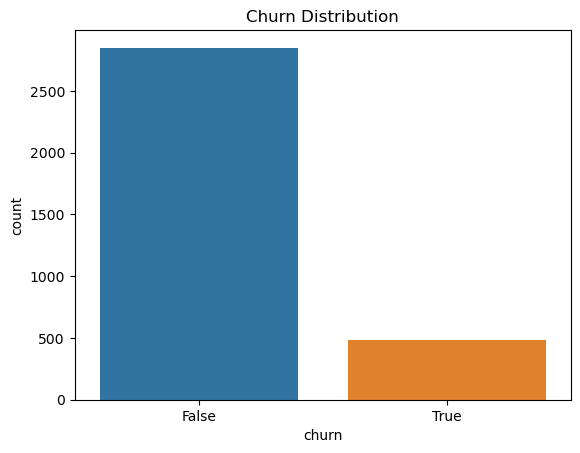

In [79]:

#Visualize the target variable
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()



Observation:

1. Significant Class Imbalance: There's a clear imbalance, with non-churning customers outnumbering churning customers by a ratio of roughly 5.6:1.

2. Business Opportunity: While retention is strong, understanding the factors contributing to the observed churn is crucial for targeted intervention and improving customer lifetime value.

BASIC CLEANING

In [80]:
#Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [81]:
#Check for duplicates
df.duplicated().sum()

0

Observation:

Upon inspection, the dataset is remarkably clean regarding missing data and duplicate entries.


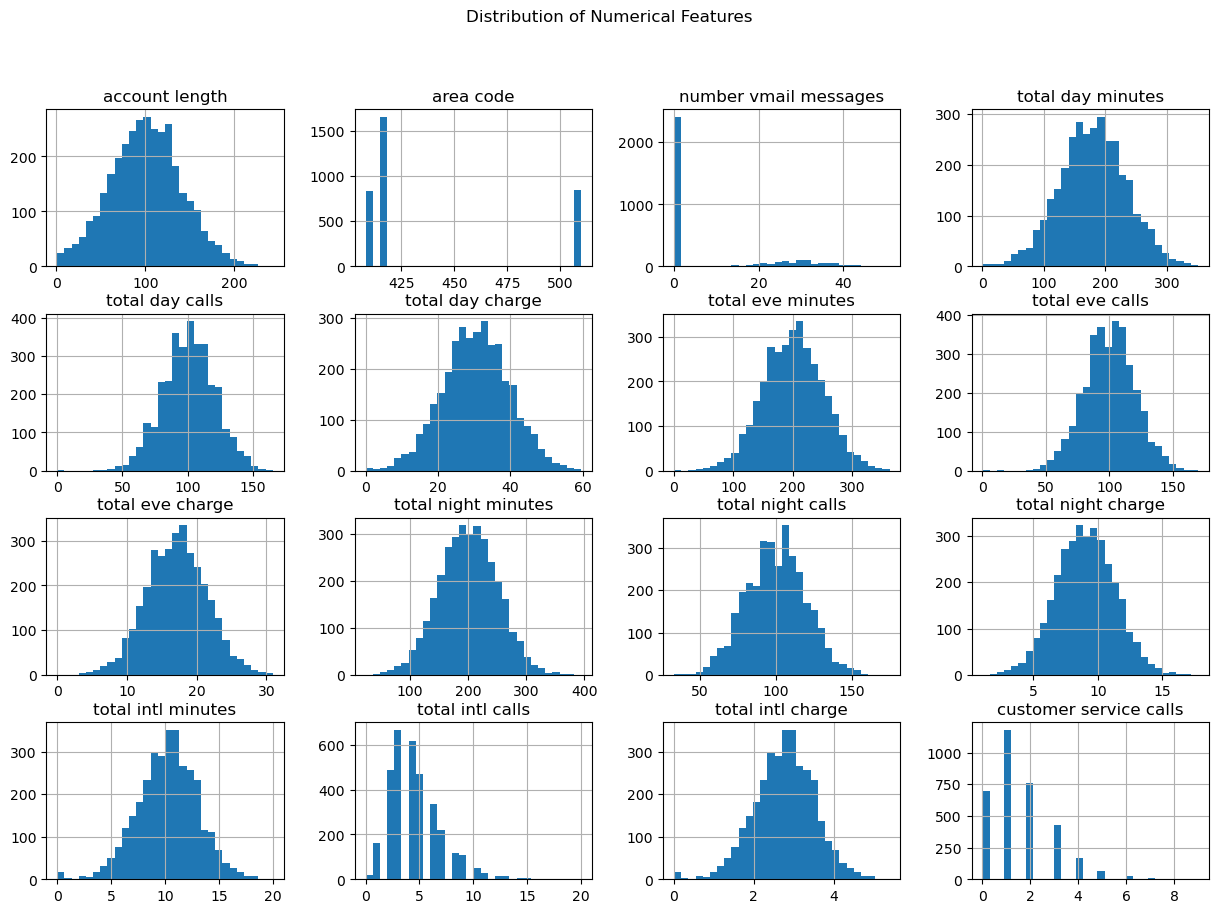

In [82]:
#Check for skewness, outliers, and spread
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()


Observation:

The majority of numerical features exhibit a relatively symmetrical, bell-shaped distribution. However, area code clearly shows discrete, categorical-like values, and both number vmail messages and customer service calls are highly skewed towards zero, indicating a prevalence of non-usage or few interactions.


--- Box Plots of Numerical Features by Churn Status ---


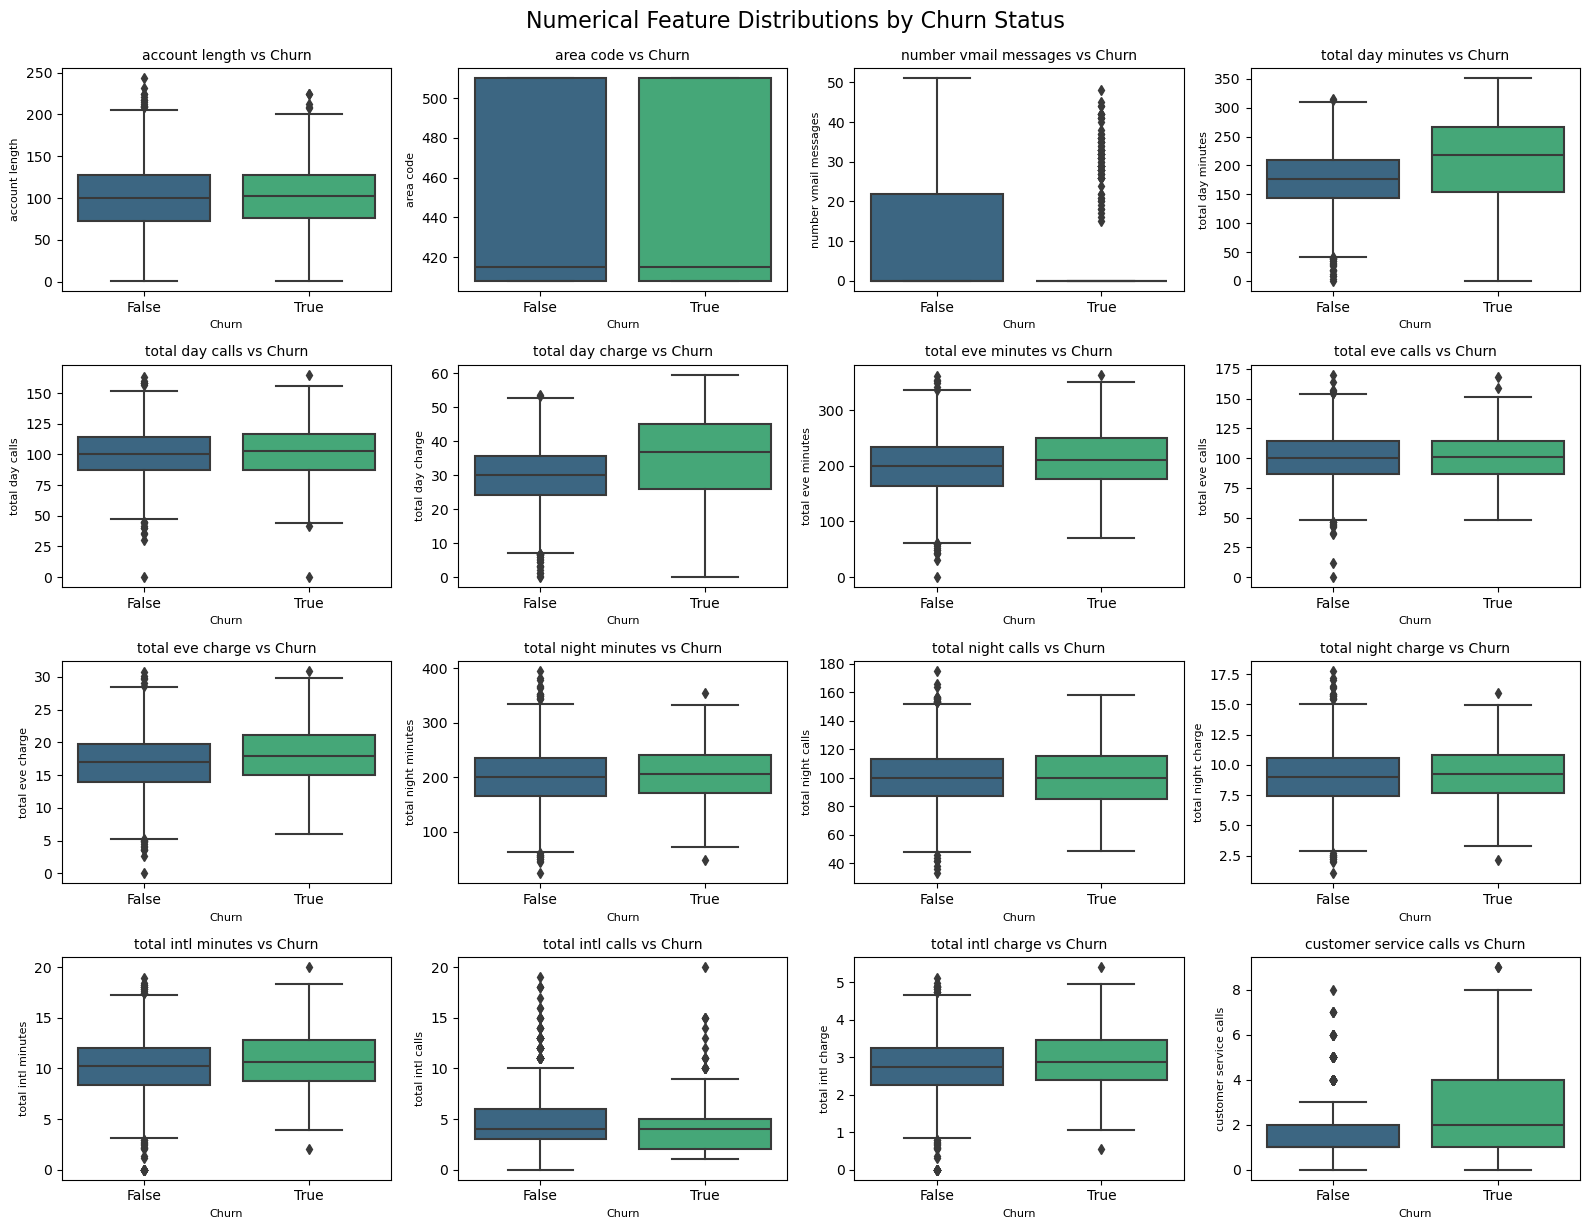


Observation: Review these plots to identify numerical features where the median, spread, or presence of outliers differs significantly between churned (True) and non-churned (False) customers. Such differences indicate potential predictive power.


In [83]:
#Identify how numerical features differ between churned vs non-churned
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'churn' in numerical_cols:
    numerical_cols.remove('churn') 

print("\n--- Box Plots of Numerical Features by Churn Status ---")

num_features = len(numerical_cols)
n_cols = 4 
n_rows = (num_features + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3)) 
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='churn', y=col, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs Churn', fontsize=10)
    axes[i].set_xlabel('Churn', fontsize=8) 
    axes[i].set_ylabel(col, fontsize=8)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.suptitle("Numerical Feature Distributions by Churn Status", y=1.02, fontsize=16) 
plt.show()

print("\nObservation: Review these plots to identify numerical features where the median, spread, or presence of outliers differs significantly between churned (True) and non-churned (False) customers. Such differences indicate potential predictive power.")

Observation:

The plots reveal key differences:
1. Higher total day minutes/charge and customer service calls are notably associated with customer churn.
2. Customers who churn also tend to have fewer number vmail messages.
3. Other numerical features, particularly call counts and account length, show less differentiation between churned and non-churned customers.
4. area code visually confirms its categorical nature.

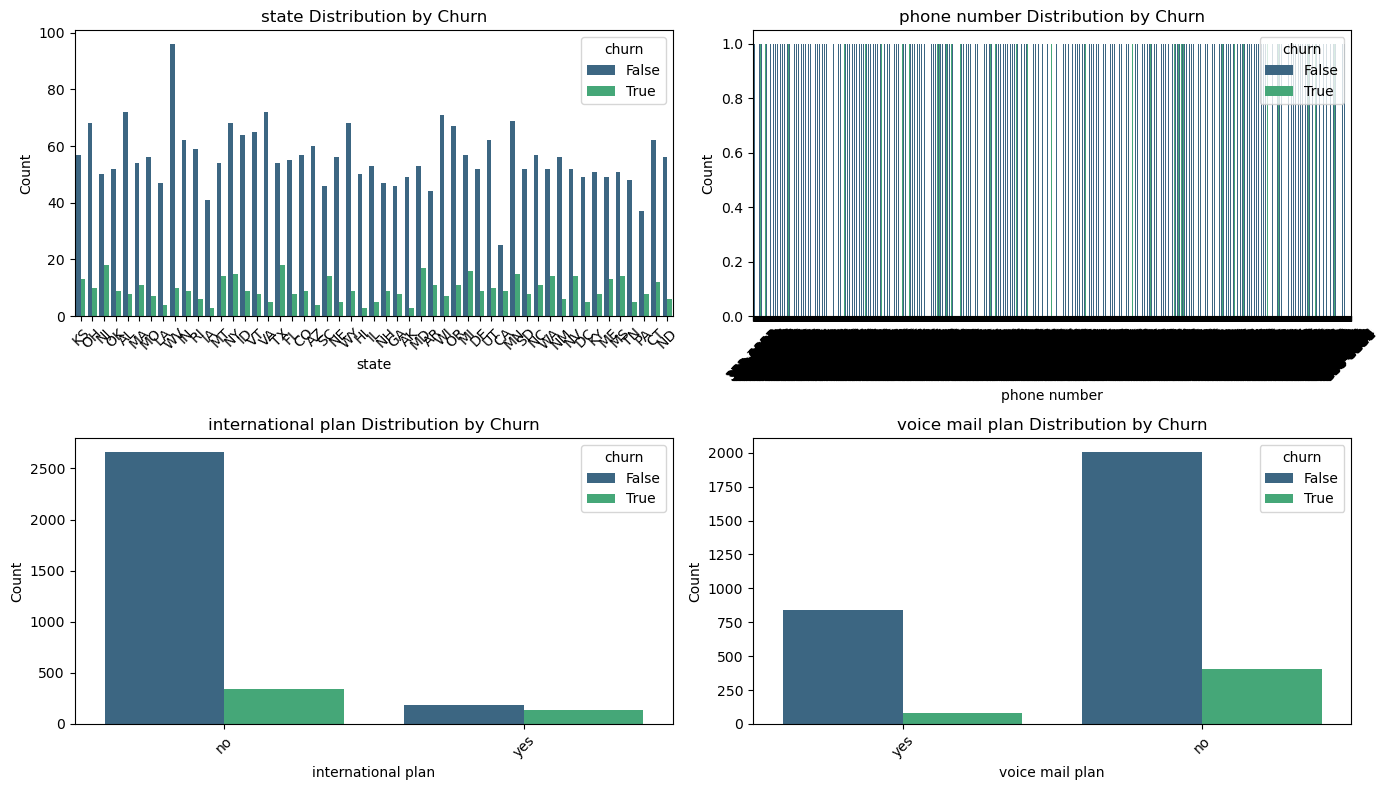

In [84]:
#Categorical feature distributions by churn status

categorical_cols_for_eda = [col for col in df.columns if df[col].dtype == 'object']

if df['churn'].dtype != 'object':
    df['churn'] = df['churn'].astype(str)

n_cols = 2
n_rows = math.ceil(len(categorical_cols_for_eda) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols_for_eda):
    sns.countplot(data=df, x=col, hue='churn', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} Distribution by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Observation:

The plots highlight that:
1. Customers with an international plan are significantly more likely to churn.
2. Customers without a voice mail plan show a higher propensity to churn.
3. State appears to have varying churn rates across different regions, indicating potential geographical influence.
4. Phone number is unique to each customer and provides no generalizable insight into churn.

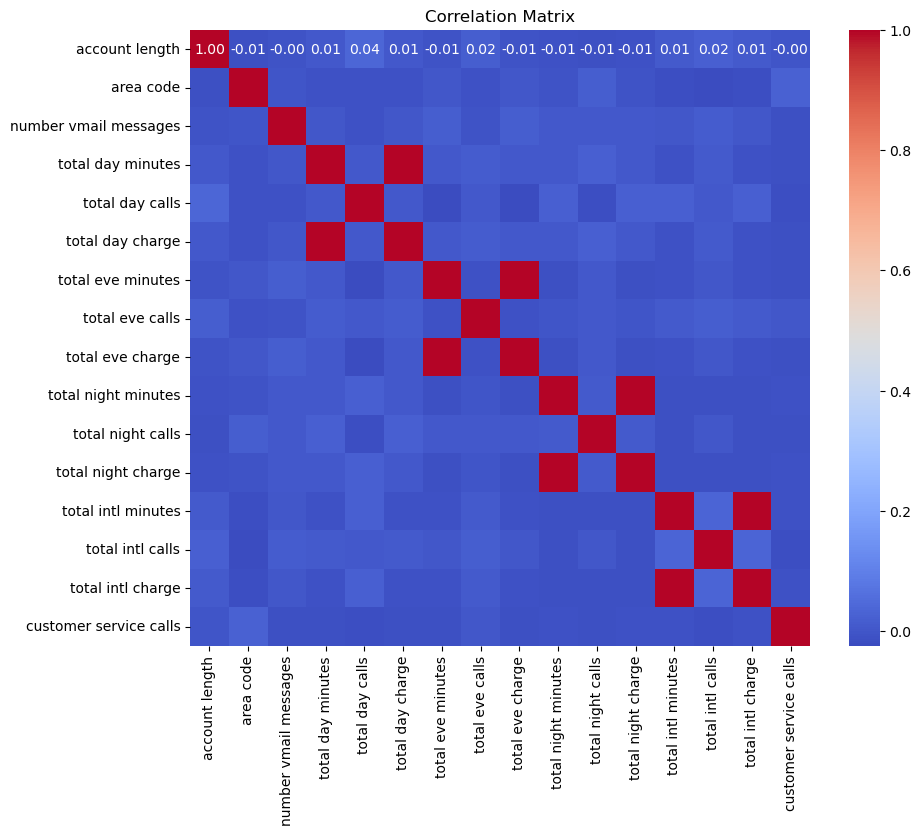

In [85]:
#Visualize correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Observation:

The correlation matrix reveals:

1. Perfect Multicollinearity: There's a perfect positive correlation (1.00) between usage minutes and corresponding charges for day, evening, night, and international calls (e.g., total day minutes and total day charge). This indicates that the charge features are directly derived from the minute features, suggesting redundancy for modeling.

2. Weak Inter-Feature Correlations: Most other numerical features show very low (close to 0) linear correlation with each other.

3. Target Variable Not Included: This matrix only shows correlations among numerical features and does not depict the correlation of any feature with the churn target variable.

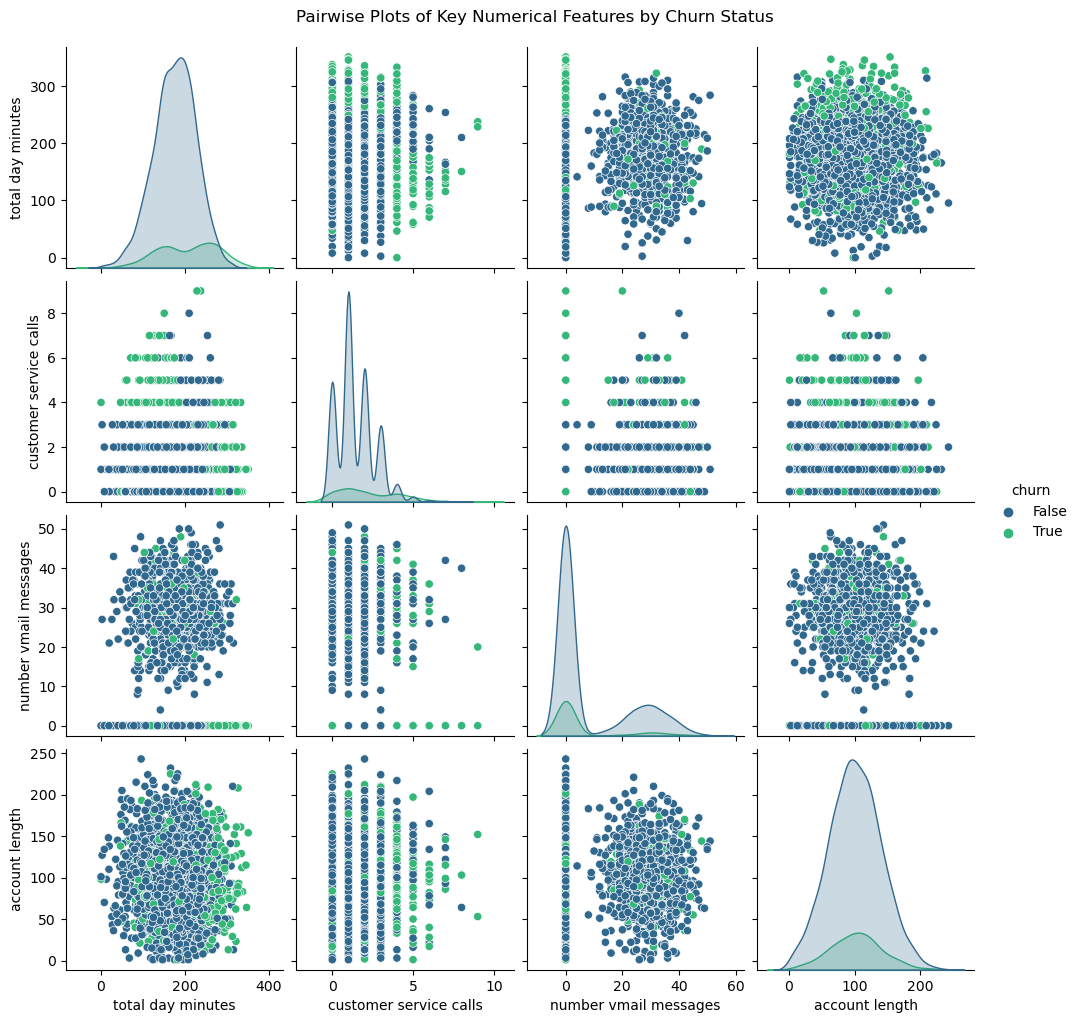


Observation: Look for visual separation or distinct clusters of 'True' (churned) vs. 'False' (non-churned) customers in the scatter plots and different distribution shapes in the diagonal KDEs. This indicates strong predictive relationships.


In [86]:

key_numerical_features = ['total day minutes', 'customer service calls', 'number vmail messages', 'account length']


if df['churn'].dtype != 'object':
    df['churn'] = df['churn'].astype(str)


df_for_pairplot = df[key_numerical_features + ['churn']]

sns.pairplot(df_for_pairplot, hue='churn', diag_kind='kde', palette='viridis') 
plt.suptitle("Pairwise Plots of Key Numerical Features by Churn Status", y=1.02) 
plt.show()

print("\nObservation: Look for visual separation or distinct clusters of 'True' (churned) vs. 'False' (non-churned) customers in the scatter plots and different distribution shapes in the diagonal KDEs. This indicates strong predictive relationships.")

Observation:

1. Higher total day minutes and customer service calls are associated with customers who churn.

2. Customers who churn also tend to have fewer number vmail messages.

3. Account length shows very little difference between churned and non-churned customers.